This code is referenced from <br>
https://colab.research.google.com/drive/1igoW8ryWYXDkcAExicaciFvHHFbscHDa

In this tutorial, we will introduce the use of MMpretrain with following content: <br>

1. get a pretrained model and test <br>
2. Prepare demo data <br>
3. Prepare the settings <br>
4. Train and test model <br>

before start, revise line 347 in mmengine/mmengine/runner/checkpoint.py <br>
make it  <br>
checkpoint = torch.load(filename, map_location=map_location, weights_only=False)

In [1]:
import os
os.getcwd()

'/home/test/ml_sample/classification/MM'

In [7]:
cd mmpretrain

/home/test/MMdet/mmpretrain


# Load a model

In [22]:
from mmpretrain.apis import list_models
from mmpretrain.apis import get_model
from mmpretrain.apis import inference_model

In [31]:
img = 'demo/demo.JPEG'

In [32]:
# there are plenty of models
# you may check what models are available on
# https://mmpretrain.readthedocs.io/en/stable/modelzoo_statistics.html
# here we search any model that named with 'swinv2'
list_models(task='Image Classification', pattern='swinv2')

['swinv2-base-w16_3rdparty_in1k-256px',
 'swinv2-base-w16_in21k-pre_3rdparty_in1k-256px',
 'swinv2-base-w24_in21k-pre_3rdparty_in1k-384px',
 'swinv2-base-w8_3rdparty_in1k-256px',
 'swinv2-large-w16_in21k-pre_3rdparty_in1k-256px',
 'swinv2-large-w24_in21k-pre_3rdparty_in1k-384px',
 'swinv2-small-w16_3rdparty_in1k-256px',
 'swinv2-small-w8_3rdparty_in1k-256px',
 'swinv2-tiny-w16_3rdparty_in1k-256px',
 'swinv2-tiny-w8_3rdparty_in1k-256px']

In [33]:
# suppose we pick a random one
model_name = 'swinv2-small-w16_3rdparty_in1k-256px'

In [34]:
model = get_model(model_name, pretrained=True, device='cuda')

04/23 10:30:26 - mmengine - INFO - Because batch augmentations are enabled, the data preprocessor automatically enables the `to_onehot` option to generate one-hot format labels.
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmclassification/v0/swin-v2/swinv2-small-w16_3rdparty_in1k-256px_20220803-b707d206.pth
04/23 10:30:27 - mmengine - INFO - Delete `relative_position_index` and `relative_coords_table` since we always re-init these params according to the `window_size`, which might cause unwanted but unworried warnings when loading checkpoint.
The model and loaded state dict do not match exactly

missing keys in source state_dict: backbone.stages.0.blocks.0.attn.w_msa.relative_coords_table, backbone.stages.0.blocks.0.attn.w_msa.relative_position_index, backbone.stages.0.blocks.1.attn.w_msa.relative_coords_table, backbone.stages.0.blocks.1.attn.w_msa.relative_position_index, backbone.stages.1.blocks.0.attn.w_msa.relative_coords_table, backbone.stages.1.bloc

In [35]:
model._metainfo

Model(
  Name=swinv2-small-w16_3rdparty_in1k-256px,
  Metadata=Metadata(
    FLOPs=8570000000,
    Parameters=49730000,
    _filepath=mmpretrain/.mim/configs/swin_transformer_v2/metafile.yml
  ),
  Results=[
    Result(
      Task=Image Classification,
      Dataset=ImageNet-1k,
      Metrics={'Top 1 Accuracy': 84.13, 'Top 5 Accuracy': 96.83},
      _filepath=mmpretrain/.mim/configs/swin_transformer_v2/metafile.yml
    ),
  ],
  Weights=https://download.openmmlab.com/mmclassification/v0/swin-v2/swinv2-small-w16_3rdparty_in1k-256px_20220803-b707d206.pth,
  Config=Config (path: /home/test/MMdet/mmpretrain/mmpretrain/.mim/configs/swin_transformer_v2/swinv2-small-w16_16xb64_in1k-256px.py): {'model': {'type': 'ImageClassifier', 'backbone': {'type': 'SwinTransformerV2', 'arch': 'small', 'img_size': 256, 'drop_path_rate': 0.3, 'window_size': [16, 16, 16, 8]}, 'neck': {'type': 'GlobalAveragePooling'}, 'head': {'type': 'LinearClsHead', 'num_classes': 1000, 'in_channels': 768, 'init_cfg': None, 

In [36]:
model._dataset_meta

{'classes': ('tench, Tinca tinca',
  'goldfish, Carassius auratus',
  'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
  'tiger shark, Galeocerdo cuvieri',
  'hammerhead, hammerhead shark',
  'electric ray, crampfish, numbfish, torpedo',
  'stingray',
  'cock',
  'hen',
  'ostrich, Struthio camelus',
  'brambling, Fringilla montifringilla',
  'goldfinch, Carduelis carduelis',
  'house finch, linnet, Carpodacus mexicanus',
  'junco, snowbird',
  'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
  'robin, American robin, Turdus migratorius',
  'bulbul',
  'jay',
  'magpie',
  'chickadee',
  'water ouzel, dipper',
  'kite',
  'bald eagle, American eagle, Haliaeetus leucocephalus',
  'vulture',
  'great grey owl, great gray owl, Strix nebulosa',
  'European fire salamander, Salamandra salamandra',
  'common newt, Triturus vulgaris',
  'eft',
  'spotted salamander, Ambystoma maculatum',
  'axolotl, mud puppy, Ambystoma mexicanum',
  'bullfr

In [37]:
%%time
result = inference_model(model, img)

CPU times: user 351 ms, sys: 0 ns, total: 351 ms
Wall time: 25.1 ms


In [38]:
# it tells you the image is sea snake
result

{'pred_scores': array([5.37592314e-05, 6.31643925e-05, 1.01779791e-04, 1.32573303e-04,
        2.13963998e-04, 1.06824729e-04, 1.20476812e-04, 8.24318049e-05,
        7.29756721e-05, 8.93997130e-05, 8.20507848e-05, 1.00248770e-04,
        1.03680759e-04, 9.16783247e-05, 1.26431041e-04, 1.09055050e-04,
        8.12049911e-05, 1.18861404e-04, 8.46372714e-05, 8.05551463e-05,
        9.42941624e-05, 1.15205403e-04, 6.70439404e-05, 1.11462810e-04,
        1.28622938e-04, 9.70013061e-05, 9.51720431e-05, 6.12285003e-05,
        1.35907831e-04, 5.55663792e-05, 6.39996506e-05, 5.24089373e-05,
        5.23768576e-05, 1.59775358e-04, 1.99277230e-04, 6.70826339e-05,
        8.27455879e-05, 8.78675273e-05, 1.19289398e-04, 1.28046348e-04,
        9.76794327e-05, 5.69332733e-05, 1.04462859e-04, 5.36652333e-05,
        1.20950892e-04, 8.25163588e-05, 8.80837324e-05, 9.87406820e-05,
        1.83730968e-04, 7.87980462e-05, 1.42283025e-04, 6.42173036e-05,
        8.59566324e-04, 5.30825753e-04, 3.9586136

In [8]:
import mmcv
# plot it
image = mmcv.imread(img, channel_order='rgb')

In [40]:
from mmengine.visualization import Visualizer
import torch
#pred_label = result['pred_label']
pred_score = result['pred_score']
pred_class = result['pred_class']
pred_print = f'{pred_class}, {pred_score:.2f}'
visualizer = Visualizer(image=image)
visualizer.draw_texts(pred_print, torch.tensor([10, 10]), font_sizes=10, colors='white', bboxes=dict(facecolor='black', linewidth=0, alpha=1))

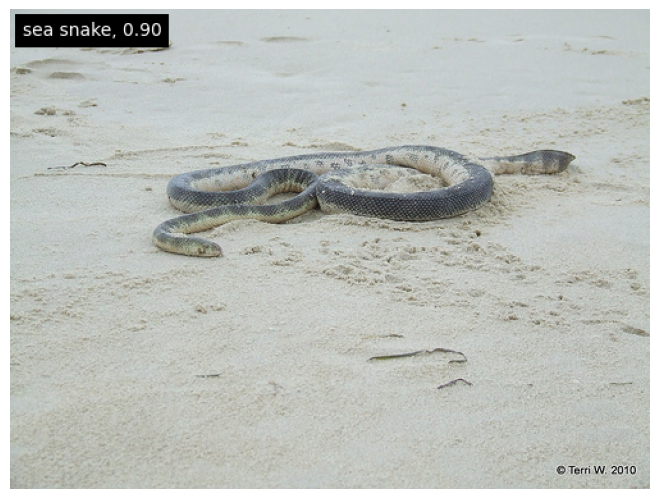

In [41]:
visualizer.show()

# Download a demo dataset

In [10]:
# package fiftyone is an open-source tool designed to help you work with datasets, offering free images and annotations
# You may also download caltech-101 at https://data.caltech.edu/records/mzrjq-6wc02, in case there is an error
import fiftyone as fo
import fiftyone.zoo as foz
# here we choose caltech101 dataset
dataset = foz.load_zoo_dataset("caltech101")

Dataset already downloaded
Loading 'caltech101'
 100% |███████████████| 1598/1598 [366.7ms elapsed, 0s remaining, 4.4K samples/s]   
Dataset 'caltech101' created


In [17]:
import os
# here we set our target objects are airplanes and motorbikes, discard other objects
# Define dataset path
data_root = "/home/test/fiftyone/caltech101/"
classes = {"airplanes": 0, "Motorbikes": 1}

# Initialize output files
train_txt_path = os.path.join(data_root, "train.txt")
val_txt_path = os.path.join(data_root, "val.txt")

# Open files for writing
with open(train_txt_path, "w") as train_file, open(val_txt_path, "w") as val_file:
    # Process each class
    for class_name, class_label in classes.items():
        class_path = os.path.join(data_root, class_name)
        images = sorted(os.listdir(class_path))  # Ensure sorted order
        
        for img_name in images:
            # Extract image index from filename (e.g., "image_0001.jpg" → 1)
            img_id = int(img_name.split("_")[1].split(".")[0])
            
            # Create relative path from data_root (needed for MMPretrain)
            rel_path = os.path.join(class_name, img_name)
            
            # Format line as "path label"
            line = f"{rel_path} {class_label}\n"
            
            # Write to train or val file
            if img_id < 700:
                train_file.write(line)
            else:
                val_file.write(line)

print(f"✅ Train annotation saved at: {train_txt_path}")
print(f"✅ Val annotation saved at: {val_txt_path}")

✅ Train annotation saved at: /home/test/fiftyone/caltech101/train.txt
✅ Val annotation saved at: /home/test/fiftyone/caltech101/val.txt


# Train our model

In [18]:
list_models(task='Image Classification', pattern='resnet')

['resnet101_8xb16_cifar10',
 'resnet101_8xb32_in1k',
 'resnet152_8xb16_cifar10',
 'resnet152_8xb32_in1k',
 'resnet18_8xb16_cifar10',
 'resnet18_8xb32_in1k',
 'resnet34_8xb16_cifar10',
 'resnet34_8xb32_in1k',
 'resnet50_8xb16_cifar10',
 'resnet50_8xb16_cifar100',
 'resnet50_8xb256-rsb-a1-600e_in1k',
 'resnet50_8xb256-rsb-a2-300e_in1k',
 'resnet50_8xb256-rsb-a3-100e_in1k',
 'resnet50_8xb32-fp16_in1k',
 'resnet50_8xb32_in1k',
 'resnet50_8xb8_cub',
 'resnet50_barlowtwins-pre_8xb32-linear-coslr-100e_in1k',
 'resnet50_byol-pre_8xb512-linear-coslr-90e_in1k',
 'resnet50_densecl-pre_8xb32-linear-steplr-100e_in1k',
 'resnet50_mocov2-pre_8xb32-linear-steplr-100e_in1k',
 'resnet50_mocov3-100e-pre_8xb128-linear-coslr-90e_in1k',
 'resnet50_mocov3-300e-pre_8xb128-linear-coslr-90e_in1k',
 'resnet50_mocov3-800e-pre_8xb128-linear-coslr-90e_in1k',
 'resnet50_simclr-200e-pre_8xb512-linear-coslr-90e_in1k',
 'resnet50_simclr-800e-pre_8xb512-linear-coslr-90e_in1k',
 'resnet50_simsiam-100e-pre_8xb512-linear-c

In [19]:
model_name = 'resnet101_8xb32_in1k'

In [20]:
model = get_model(model_name, pretrained=True, device='cuda')

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmclassification/v0/resnet/resnet101_8xb32_in1k_20210831-539c63f8.pth


In [21]:
model._metainfo

Model(
  Name=resnet101_8xb32_in1k,
  Metadata=Metadata(
    FLOPs=7850000000,
    Parameters=44550000,
    _filepath=mmpretrain/.mim/configs/resnet/metafile.yml
  ),
  Results=[
    Result(
      Task=Image Classification,
      Dataset=ImageNet-1k,
      Metrics={'Top 1 Accuracy': 77.97, 'Top 5 Accuracy': 94.06},
      _filepath=mmpretrain/.mim/configs/resnet/metafile.yml
    ),
  ],
  Weights=https://download.openmmlab.com/mmclassification/v0/resnet/resnet101_8xb32_in1k_20210831-539c63f8.pth,
  Config=Config (path: /home/test/MMdet/mmpretrain/mmpretrain/.mim/configs/resnet/resnet101_8xb32_in1k.py): {'model': {'type': 'ImageClassifier', 'backbone': {'type': 'ResNet', 'depth': 101, 'num_stages': 4, 'out_indices': (3,), 'style': 'pytorch'}, 'neck': {'type': 'GlobalAveragePooling'}, 'head': {'type': 'LinearClsHead', 'num_classes': 1000, 'in_channels': 2048, 'loss': {'type': 'CrossEntropyLoss', 'loss_weight': 1.0}, 'topk': (1, 5)}, 'data_preprocessor': {'num_classes': 1000, 'mean': [123.

In [22]:
model._dataset_meta

{'classes': ['tench, Tinca tinca',
  'goldfish, Carassius auratus',
  'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
  'tiger shark, Galeocerdo cuvieri',
  'hammerhead, hammerhead shark',
  'electric ray, crampfish, numbfish, torpedo',
  'stingray',
  'cock',
  'hen',
  'ostrich, Struthio camelus',
  'brambling, Fringilla montifringilla',
  'goldfinch, Carduelis carduelis',
  'house finch, linnet, Carpodacus mexicanus',
  'junco, snowbird',
  'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
  'robin, American robin, Turdus migratorius',
  'bulbul',
  'jay',
  'magpie',
  'chickadee',
  'water ouzel, dipper',
  'kite',
  'bald eagle, American eagle, Haliaeetus leucocephalus',
  'vulture',
  'great grey owl, great gray owl, Strix nebulosa',
  'European fire salamander, Salamandra salamandra',
  'common newt, Triturus vulgaris',
  'eft',
  'spotted salamander, Ambystoma maculatum',
  'axolotl, mud puppy, Ambystoma mexicanum',
  'bullfr

In [23]:
# set configs for our model
# please revise the details inside for your task, take attention to #
# if you have no idea how to revise, just set %run tools/train.py configs/resnet/resnet101_8xb32.py first
# it will generate the used configs in work_dirs/
# then, you can copy the part that need to be revised and edit on it
# for more augmentation, you can refer to
# https://mmpretrain.readthedocs.io/en/latest/api/data_process.html

config = """
# set model name
_base_ = './resnet50_8xb32_in1k.py'

model = dict(
    backbone=dict(
        frozen_stages=1,
        init_cfg=dict(
            type='Pretrained',
            # paste the url you just see which start with 'https://download.openmmlab.com/'
            # to checkpoint = ''
            checkpoint='https://download.openmmlab.com/mmclassification/v0/resnet/resnet101_8xb32_in1k_20210831-539c63f8.pth',
            prefix='backbone'
        )
    ),
    head=dict(
        num_classes=2, # number of classes 
        loss=dict(type='CrossEntropyLoss', loss_weight=1.0)
    )
)
# names of classes
classes = ('airplanes', 'Motorbikes') # class names
# dataset location
data_root = '/home/test/fiftyone/caltech101/' # data location

data_preprocessor = dict(
    num_classes=2,  # number of classes 
    mean=[125.307, 122.961, 113.8575],
    std=[51.5865, 50.847, 51.255],
    to_rgb=False
)
# customed augmentation
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='RandomResizedCrop', scale=224),
    dict(type='RandomFlip', prob=0.5, direction='horizontal'),
    dict(type='PackInputs')
]
val_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='RandomResizedCrop', scale=224),
    dict(type='PackInputs')
]

# Training parameters, set according to you device capacity
batch_size_per_gpu = 16
num_workers = 8

# Train dataset
train_dataloader = dict(
    batch_size=batch_size_per_gpu,
    num_workers=num_workers,
    dataset=dict(
        _delete_=True,
        type='CustomDataset',
        data_root=data_root,
        ann_file='train.txt', #annotation file if exist
        data_prefix=dict(img_path=''),
        classes=classes,
        pipeline=train_pipeline
    )
)

# Validation dataset
val_dataloader = dict(
    batch_size=batch_size_per_gpu,
    num_workers=num_workers,
    dataset=dict(
        _delete_=True,
        type='CustomDataset',
        data_root=data_root, #annotation file if exist
        ann_file='val.txt',
        data_prefix=dict(img_path=''),
        classes=classes,
        pipeline=val_pipeline
    )
)

test_dataloader = val_dataloader

# Evaluator configuration 
val_evaluator = dict(type='Accuracy', topk=(1,))  # Only use top-1 accuracy
test_evaluator = dict(type='Accuracy', topk=(1,))  # Only use top-1 accuracy

# Evaluator
optim_wrapper = dict(optimizer=dict(type='SGD', lr=0.001, momentum=0.9, weight_decay=0.0001))
param_scheduler = dict(type='MultiStepLR', by_epoch=True, milestones=[100, 150], gamma=0.1)
train_cfg = dict(by_epoch=True, max_epochs=200, val_interval=1)
auto_scale_lr = dict(base_batch_size=128)

## Initialization
load_from = None
resume = False
"""
# here we create the config file, you may rename it
with open('./configs/resnet/resnet101_8xb32_planenbike.py', 'w') as f:
    f.write(config)

In [ ]:
'''
If you want to use Albumentations, add this script to above code, 
right above 
train_pipeline = [
    dict(type='LoadImageFromFile'),

a_transforms = [
    dict(
        type='Affine',
        scale=(0.9, 1.1),  
        translate_percent=(0.0, 0.0625),
        rotate=(-45, 45), 
        interpolation=1,
        p=0.5),
    dict(
        type='OneOf',
        transforms=[
            dict(type='CLAHE', clip_limit=4.0, tile_grid_size=(8, 8), p=1.0),
            dict(type='ColorJitter', brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1, p=1.0),
            dict(type='RandomBrightnessContrast', brightness_limit=0.2, contrast_limit=0.2, p=1.0),
            dict(type='Equalize', p=1.0),
        ],
        p=0.2),
    dict(
        type='OneOf',
        transforms=[
            dict(type='Blur', blur_limit=3, p=1.0),
            dict(type='MedianBlur', blur_limit=3, p=1.0),
        ],
        p=0.2),
    dict(
        type='OneOf',
        transforms=[
            dict(type='ElasticTransform', alpha=1.0, sigma=50.0, p=1.0),
            dict(type='GridDistortion', p=1.0),
            dict(type='OpticalDistortion', distort_limit=0.05, p=1.0),
        ],
        p=0.2),
]

and insert 
    dict(type='Albu', transforms=a_transforms),
right after
train_pipeline = [
    dict(type='LoadImageFromFile'),
'''

In [13]:
# start training !!

In [24]:
%run tools/train.py configs/resnet/resnet101_8xb32_planenbike.py

04/23 10:22:40 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.16 (main, Dec 11 2024, 16:24:50) [GCC 11.2.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 299920148
    GPU 0,1: NVIDIA GeForce RTX 5090
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 12.8, V12.8.93
    GCC: gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.8.0.dev20250422+cu128
    PyTorch compiling details: PyTorch built with:
  - GCC 11.2
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2024.2-Product Build 20240605 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.7.1 (Git Hash 8d263e693366ef8db40acc569cc7d8edf644556d)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX512
  - CUDA Runtime 12.8
  - NVCC architecture flags: -gencode;arch=compu

/opt/miniconda3/envs/py310mmdet2/lib/python3.10/site-packages/mmengine/logging/message_hub.py:346: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/aten/src/ATen/native/Scalar.cpp:22.)
  value = value.item()


04/23 10:22:42 - mmengine - INFO - Exp name: resnet101_8xb32_planenbike_20250423_102239
04/23 10:22:42 - mmengine - INFO - Epoch(train)   [1][88/88]  lr: 1.0000e-03  eta: 0:04:55  time: 0.0155  data_time: 0.0002  memory: 1158  loss: 0.1108
04/23 10:22:42 - mmengine - INFO - Saving checkpoint at 1 epochs
04/23 10:22:42 - mmengine - INFO - Epoch(val) [1][13/13]    accuracy/top1: 99.5000  data_time: 0.0202  time: 0.0255
04/23 10:22:43 - mmengine - INFO - Exp name: resnet101_8xb32_planenbike_20250423_102239
04/23 10:22:43 - mmengine - INFO - Epoch(train)   [2][88/88]  lr: 1.0000e-03  eta: 0:04:00  time: 0.0104  data_time: 0.0002  memory: 1157  loss: 0.0300
04/23 10:22:43 - mmengine - INFO - Saving checkpoint at 2 epochs
04/23 10:22:44 - mmengine - INFO - Epoch(val) [2][13/13]    accuracy/top1: 100.0000  data_time: 0.0010  time: 0.0058
04/23 10:22:45 - mmengine - INFO - Exp name: resnet101_8xb32_planenbike_20250423_102239
04/23 10:22:45 - mmengine - INFO - Epoch(train)   [3][88/88]  lr: 1.0

In [9]:
# Inference our trained model
from mmpretrain.apis import inference_model
from mmpretrain.apis import ImageClassificationInferencer

In [10]:
# find the trained model saved in "work_dirs/" and revise the location
inferencer = ImageClassificationInferencer('configs/resnet/resnet101_8xb32_planenbike.py', pretrained='work_dirs/resnet101_8xb32_planenbike/epoch_200.pth', device='cuda')

Loads checkpoint by local backend from path: work_dirs/resnet101_8xb32_planenbike/epoch_200.pth


In [11]:
inferencer.model

ImageClassifier(
  (data_preprocessor): ClsDataPreprocessor()
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplac

In [12]:
img = '/home/test/fiftyone/caltech101/airplanes/image_0800.jpg'

In [13]:
%%time
result = inferencer(img)

CPU times: user 248 ms, sys: 0 ns, total: 248 ms
Wall time: 6.71 ms


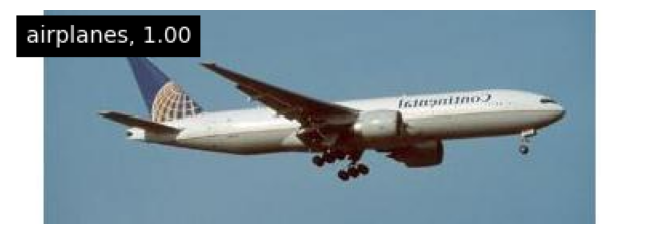

In [17]:
from mmengine.visualization import Visualizer
image = mmcv.imread(img, channel_order='rgb')
pred_score = result[0]['pred_score']
pred_class = result[0]['pred_class']
pred_print = f'{pred_class}, {pred_score:.2f}'
visualizer = Visualizer(image=image)
visualizer.draw_texts(pred_print, torch.tensor([10, 10]), font_sizes=10, colors='white', bboxes=dict(facecolor='black', linewidth=0, alpha=1))
visualizer.show()

We can plot the learning curve  <br>
first, get the location of loss record saved as json <br>
in our sample case <br>
work_dirs/resnet101_8xb32_planenbike/20250408_162207/vis_data/20250408_162207.json

In [18]:
output_dir = "./output"
import os
os.makedirs(output_dir, exist_ok=True)  
# Create the directory if it doesn't exist, and run the below line
# you need to rename the location
# after running below line, the curve is saved at output/losses.pdf

plot curve of work_dirs/resnet101_8xb32_planenbike/20250423_102239/vis_data/20250423_102239.json, metric is loss
save curve to: ./output/losses.pdf


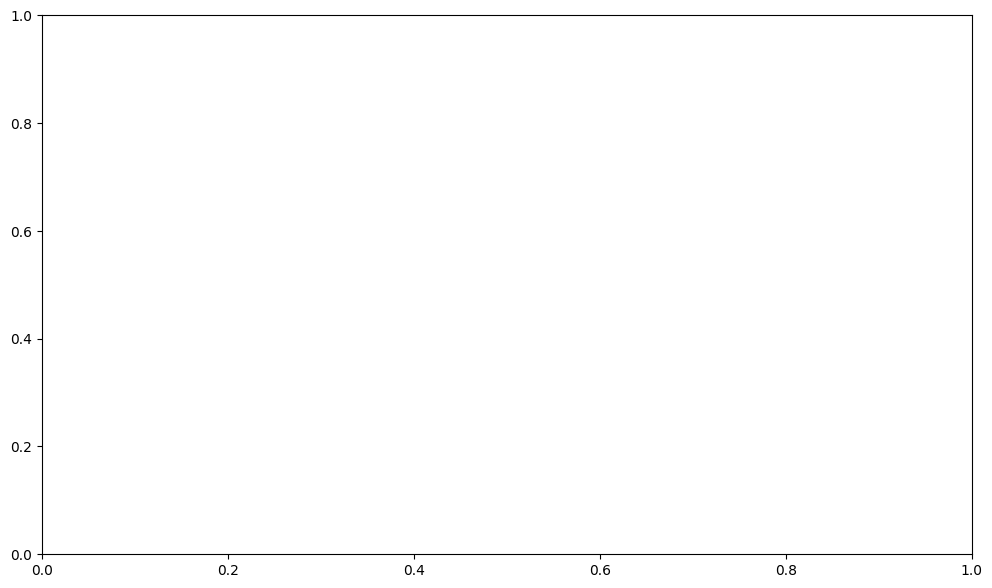

In [20]:
%run tools/analysis_tools/analyze_logs.py plot_curve work_dirs/resnet101_8xb32_planenbike/20250423_102239/vis_data/20250423_102239.json --keys loss --legend loss --out $output_dir/losses.pdf